# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [32]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [33]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [34]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

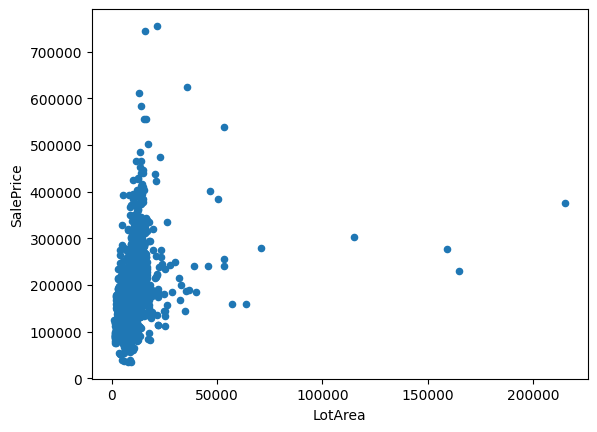

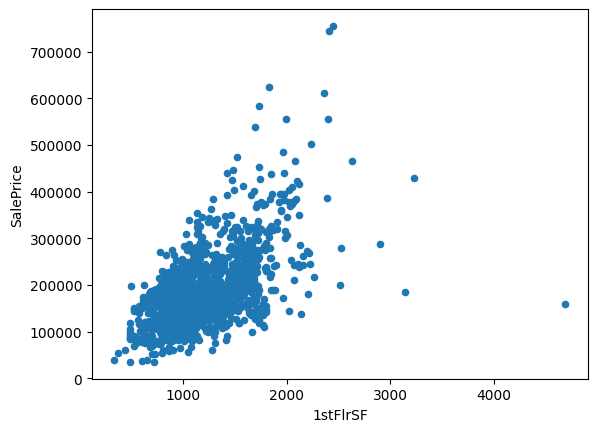

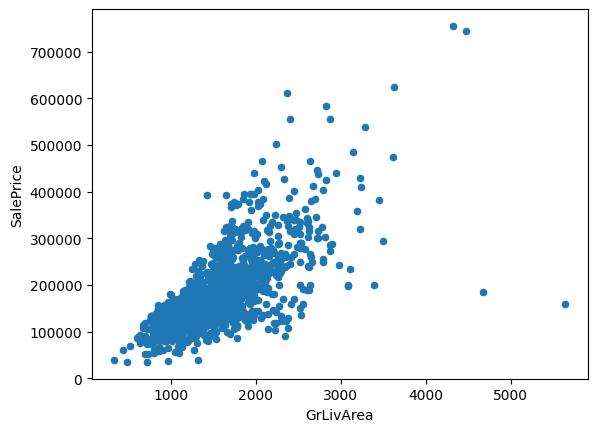

In [35]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt
ames_subset.plot.scatter(x="LotArea", y="SalePrice");
ames_subset.plot.scatter(x="1stFlrSF", y="SalePrice");
ames_subset.plot.scatter(x="GrLivArea", y="SalePrice");


# fig = plt.figure(figsize=(15,5))
# sm.graphics.plot_partregress_grid(second_results, exog_idx=["weight", "model year"], fig=fig)
# plt.tight_layout()
# plt.show()

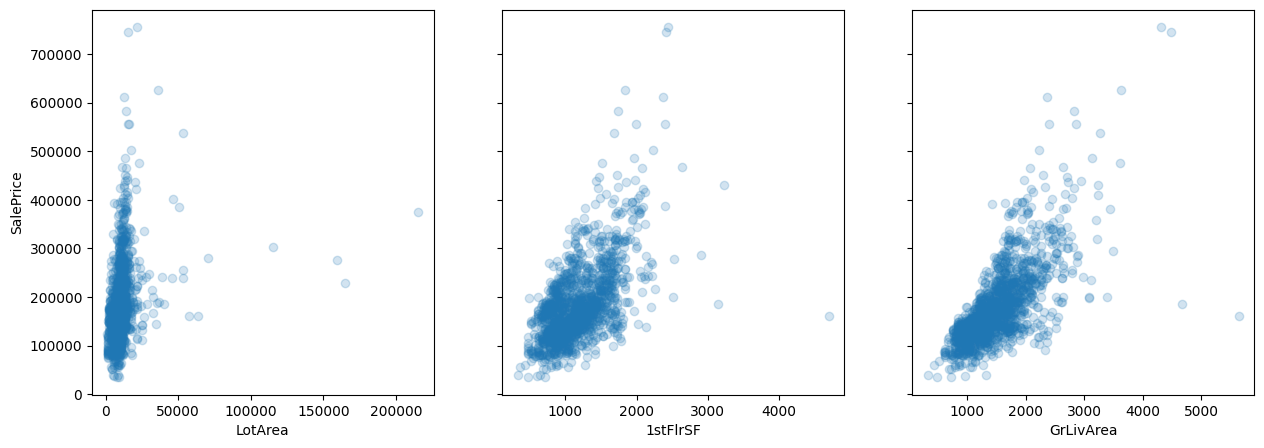

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=3, figsize=(15,5), sharey=True)
axes[0].set_ylabel("SalePrice")

for i, col in enumerate(ames_subset.drop("SalePrice", axis=1).columns):
    ax = axes[i]
    ax.scatter(ames_subset[col], ames_subset["SalePrice"], alpha=0.2)
    ax.set_xlabel(col)

In [37]:
# Your written answer here - do these seem like good candidates for linear regression?
"""
All three of these features seem to have a linear relationship with SalePrice

1stFlrSF seems to have the most variance vs. SalePrice

All three have a few outliers that could potentially skew the results
"""

'\nAll three of these features seem to have a linear relationship with SalePrice\n\n1stFlrSF seems to have the most variance vs. SalePrice\n\nAll three have a few outliers that could potentially skew the results\n'

To determine if the output of these scatterplots indicates good candidates for linear regression, you'll want to look for **linear patterns** in the relationships between each independent variable (on the x-axis) and the dependent variable (`SalePrice` on the y-axis). Here's what you should assess:

### Indicators of Good Candidates:
1. **Linear Relationship**: A clear, linear trend (positive or negative slope) in the scatterplots indicates a potential good fit for linear regression.
2. **Low Variability**: The points should cluster closely around an imaginary straight line, suggesting a strong relationship.
3. **No Obvious Outliers**: Extreme outliers can distort the regression results and may need to be handled.
4. **Even Distribution**: Avoid fanning or curved patterns, as these suggest heteroscedasticity or nonlinearity.

### Indicators of Poor Candidates:
1. **No Clear Pattern**: If the points appear randomly scattered without any trend, this variable might not correlate well with `SalePrice`.
2. **Nonlinear Relationship**: Curved or quadratic trends suggest that a simple linear regression might not be suitable (though transformations might help).
3. **Heteroscedasticity**: Increasing or decreasing variance in the points as you move along the x-axis can indicate issues with the assumptions of linear regression.
4. **Clusters**: Distinct groups of points might indicate categorical variables or other effects requiring special handling.

### Next Steps:
- If some variables show nonlinearity, consider transforming them (e.g., log, square root) to linearize the relationship.
- Calculate correlation coefficients to quantify linear relationships.
- Use diagnostic plots, such as residuals vs. fitted values, to further assess suitability after fitting the regression model.


## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [38]:
# Your code here - define y and baseline X
y = ames_subset["SalePrice"]
X_baseline = ames_subset[["LotArea"]]

In [39]:
# Your code here - import StatsModels, fit baseline model, display results\

import statsmodels.api as sm
X_baseline = sm.add_constant(X_baseline)
model_baseline = sm.OLS(y, X_baseline).fit()
print(model_baseline.summary())

# baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
# baseline_results = baseline_model.fit()

# print(baseline_results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.12e-24
Time:                        06:58:36   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.588e+05   2914.717     54.495      0.0

In [40]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.12e-24
Time:                        06:58:36   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.588e+05   2914.717     54.495      0.0

# Your written answer here - interpret model results
The output provides the results of an Ordinary Least Squares (OLS) regression of `SalePrice` on `LotArea` using the `statsmodels` library. Here is a breakdown of the results:

---

### **Key Metrics:**
1. **Dependent Variable**: `SalePrice`  
   This is the target variable we are trying to model.

2. **R-squared**: 0.070 (7%)  
   - This indicates that `LotArea` explains **7% of the variance** in `SalePrice`. 
   - This is a low value, suggesting that `LotArea` alone is not a strong predictor of `SalePrice`.

3. **Adjusted R-squared**: 0.069  
   - Slightly lower than R-squared because it adjusts for the number of predictors. Since there's only one predictor, the difference is minimal.

4. **F-statistic**: 109.1, **p-value < 0.0001**  
   - The F-test tests whether the model has explanatory power compared to a model with no predictors.
   - The very small p-value indicates that `LotArea` is statistically significant as a predictor of `SalePrice`.

---

### **Coefficients:**

- **Interpretation of Coefficients**:
  - **Intercept (`const`)**: 
    - The baseline value of `SalePrice` is approximately **$158,800** when `LotArea` is 0.
    - Note: The intercept has limited interpretive value here since a `LotArea` of 0 is unrealistic.
  - **Slope (`LotArea`)**: 
    - For each additional square unit of `LotArea`, the `SalePrice` increases by approximately **$2.10**.
    - This is a small but statistically significant effect.

---

### **Overall Assessment:**
- **Strengths**:
  - `LotArea` is statistically significant (p-value < 0.0001).
  - The model provides a straightforward relationship between `LotArea` and `SalePrice`.

- **Weaknesses**:
  - The R-squared value is low, indicating that `LotArea` alone does not explain much of the variability in `SalePrice`.
  - Residuals are not normally distributed, which might suggest model misspecification or the need for transformations.


## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [41]:
# Your code here - define X
X_sec = ames_subset[["LotArea", "1stFlrSF", "GrLivArea"]]
X_sec

,LotArea,1stFlrSF,GrLivArea
Id,,,
1,8450,856,1710
2,9600,1262,1262
3,11250,920,1786
4,9550,961,1717
5,14260,1145,2198
...,...,...,...
1456,7917,953,1647
1457,13175,2073,2073
1458,9042,1188,2340


In [42]:
# Your code here - fit model and display results
second_model = sm.OLS(y, sm.add_constant(X_sec))

second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.57e-262
Time:                        06:58:36   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

# Your written answer here - interpret model results. Does this model seem better than the previous one?
The OLS regression results represent a multiple linear regression model predicting `SalePrice` using three independent variables: `LotArea`, `1stFlrSF` (first-floor square footage), and `GrLivArea` (above-grade living area square footage). Here's the interpretation:

---

### **Key Metrics:**
1. **R-squared**: 0.565 (56.5%)  
   - The model explains **56.5% of the variance** in `SalePrice`.
   - This is a reasonably good fit for a linear regression model.

2. **Adjusted R-squared**: 0.564 (56.4%)  
   - Slightly lower than R-squared, as it accounts for the number of predictors in the model.

3. **F-statistic**: 630.3, **p-value < 0.0001**  
   - The overall model is statistically significant.
   - At least one predictor contributes meaningfully to explaining `SalePrice`.

---


- **Interpretation of Coefficients**:
  - **Intercept (`const`)**:  
    - When all predictors (`LotArea`, `1stFlrSF`, `GrLivArea`) are zero, the predicted `SalePrice` would be approximately **-14,310**. This value is not meaningful since these predictors cannot realistically be zero.
  - **LotArea**:  
    - For every additional square unit in `LotArea`, the `SalePrice` increases by **$0.28**, holding other predictors constant.
    - The p-value (0.051) is marginally above the standard significance threshold (0.05), suggesting that `LotArea` may not significantly contribute to the model.
  - **1stFlrSF**:  
    - For every additional square foot of first-floor area, the `SalePrice` increases by **$60.29**, holding other predictors constant.
    - Highly significant (p-value < 0.001).
  - **GrLivArea**:  
    - For every additional square foot of above-grade living area, the `SalePrice` increases by **$80.61**, holding other predictors constant.
    - Also highly significant (p-value < 0.001).

---


### **Overall Assessment:**
- **Model Strength**:
  - The model fits the data reasonably well (R-squared = 56.5%).
  - `1stFlrSF` and `GrLivArea` are highly significant predictors of `SalePrice`.
  - `LotArea` has a small coefficient and is marginally significant.
- **Model Weakness**:
  - Non-normality in residuals may indicate that the linear regression assumptions are not fully met.
  - The high condition number suggests potential multicollinearity or scaling issues.


## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

c:\Users\Edwin George\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\Edwin George\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\Edwin George\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always b

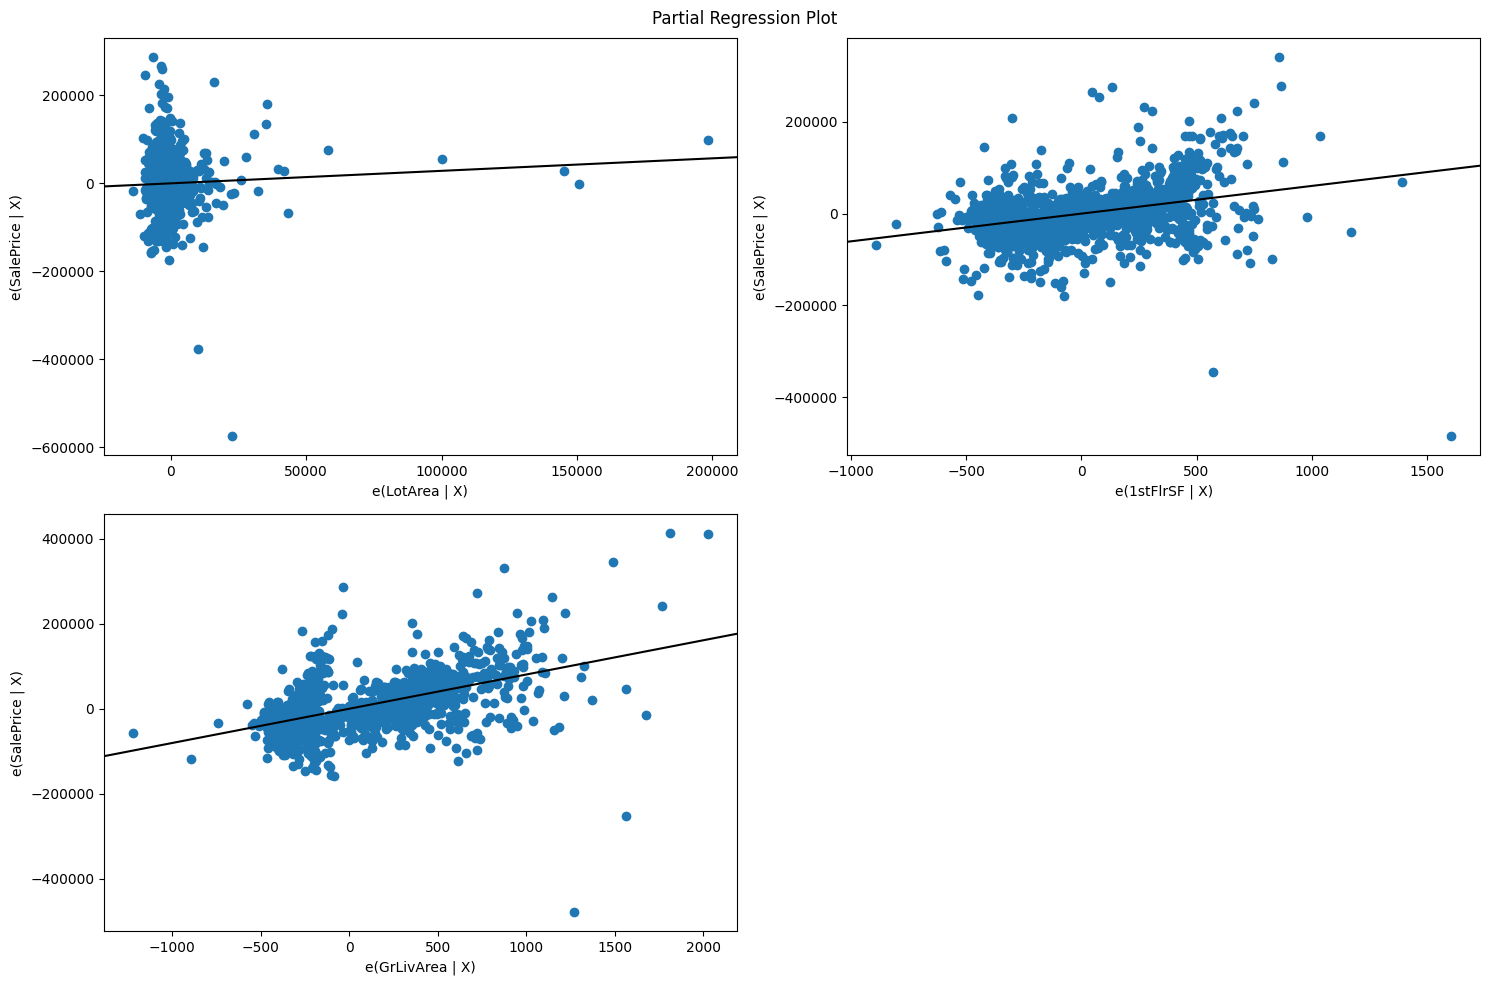

In [43]:
# Your code here - create partial regression plots for each predictor
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(second_results, exog_idx=["LotArea", "1stFlrSF", "GrLivArea"], fig=fig)
plt.tight_layout()
plt.show()

# Your written answer here - explain what you see, and how this relates to what you saw in Step 1. What do you notice?

The two sets of plots provided offer insights into the relationship between the predictors (`LotArea`, `1stFlrSF`, and `GrLivArea`) and the dependent variable (`SalePrice`) in your regression analysis. Here's what they show and how they relate to the earlier steps:

---

### **Partial Regression Plots**
Partial regression plots (also called added-variable plots) show the relationship between the residuals of the dependent variable (`SalePrice`) and the independent variable, while accounting for the effect of all other predictors in the model.

1. **`LotArea`**:  
   - The relationship appears weak, as indicated by the near-horizontal line.
   - Most data points are clustered at smaller values of `LotArea`, with some outliers at higher values.
   - This aligns with earlier observations where `LotArea` had the weakest effect among the predictors, as seen in its coefficient and higher p-value.

2. **`1stFlrSF`**:  
   - A positive relationship is evident, with the line indicating a stronger correlation than `LotArea`.
   - Points are more tightly clustered, showing less variability compared to `LotArea`.

3. **`GrLivArea`**:  
   - A strong positive relationship is visible, with most points aligning well with the regression line.
   - This suggests `GrLivArea` is a significant predictor of `SalePrice`, which aligns with its high coefficient and significance in the model summary.

---

### **Raw Scatter Plots**
These scatter plots show the raw relationships between each predictor and `SalePrice` without accounting for other predictors in the model.

1. **`LotArea`**:
   - A weak, scattered relationship is visible, with many points concentrated at smaller values of `LotArea` and no strong upward trend.
   - Outliers are evident at very high `LotArea` values, which could affect the regression fit.

2. **`1stFlrSF`**:
   - A clearer positive trend is visible compared to `LotArea`, with more points showing a gradual increase in `SalePrice` as `1stFlrSF` increases.
   - There is still some spread, but it is less pronounced than for `LotArea`.

3. **`GrLivArea`**:
   - The strongest positive trend is visible here, with `SalePrice` increasing significantly as `GrLivArea` increases.
   - Most points cluster tightly along the trend line, confirming its importance as a predictor.

---

### **Relationship Between Steps**
- In **Step 1**, the raw scatter plots showed initial patterns between predictors and `SalePrice`. They indicated that `LotArea` had a weak effect, while `1stFlrSF` and `GrLivArea` had stronger relationships.
- The **partial regression plots** add to this by showing how each predictor contributes to the model after accounting for other predictors. These plots reinforce the idea that `LotArea` has a negligible effect, while `1stFlrSF` and especially `GrLivArea` have significant contributions.

---

### **Key Observations**
- The **weak effect of `LotArea`** is consistent across both types of plots.
- The **strong influence of `GrLivArea`** is evident in both scatter and partial regression plots.
- Partial regression plots help clarify the independent contribution of each predictor, aligning with the regression results (coefficients and p-values).

These visualizations help confirm the findings from your earlier regression model and highlight areas to refine the model (e.g., dealing with outliers or considering nonlinear effects).

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [44]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression

In [52]:
print("Statsmodels X columns:", X_baseline.columns)

# Fit the model using Scikit-learn
X_sklearn = X_baseline.drop("const", axis=1)  # Ensure constant column is dropped
print("Scikit-learn X columns:", X_sklearn.columns)

# Now compare
sklearn_baseline_model = LinearRegression()
sklearn_baseline_model.fit(X_sklearn, y)

# Compare results
print(f"""
StatsModels R-Squared:    {baseline_results.rsquared}
scikit-learn R-Squared:   {sklearn_baseline_model.score(X_sklearn, y)}

StatsModels intercept:    {baseline_results.params["const"]}
scikit-learn intercept:   {sklearn_baseline_model.intercept_}

StatsModels coefficient (LotArea):   {baseline_results.params["LotArea"]}
scikit-learn coefficient (LotArea):  {sklearn_baseline_model.coef_[0]}

""")


Statsmodels X columns: Index(['const', 'LotArea'], dtype='object')
Scikit-learn X columns: Index(['LotArea'], dtype='object')

StatsModels R-Squared:    0.06961331538211202
scikit-learn R-Squared:   0.0696133153821119

StatsModels intercept:    158836.15189687654
scikit-learn intercept:   158836.1518968766

StatsModels coefficient (LotArea):   2.099971951707675
scikit-learn coefficient (LotArea):  2.0999719517076736




In [47]:
# If X_baseline is missing the columns:
X_sklearn = ames_subset[["LotArea", "1stFlrSF", "GrLivArea"]]
y_sklearn = ames_subset["SalePrice"]

from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model_sklearn = LinearRegression()
model_sklearn.fit(X_sklearn, y_sklearn)

# Get the R-squared, coefficients, and intercept
r_squared = model_sklearn.score(X_sklearn, y_sklearn)
coefficients = model_sklearn.coef_
intercept = model_sklearn.intercept_

# Print the results
print("R-Squared:", r_squared)
print("Intercept:", intercept)
print("Coefficients:", coefficients)


R-Squared: 0.5649801771384368
Intercept: -14313.408857494389
Coefficients: [ 0.28413359 60.28664625 80.60605834]


In [49]:
# Your code here - compare intercept and coefficients
# Statsmodels coefficients
statsmodels_intercept = -14310
statsmodels_coefficients = [0.2841, 60.2866, 80.6061]

# Print Scikit-learn results
print("Scikit-learn Intercept:", intercept)
print("Scikit-learn Coefficients:", coefficients)

# Compare
print("\nComparison:")
print("Intercept Difference:", abs(statsmodels_intercept - intercept))
print("Coefficient Differences:", [abs(scikit - stats) for scikit, stats in zip(coefficients, statsmodels_coefficients)])


Scikit-learn Intercept: -14313.408857494389
Scikit-learn Coefficients: [ 0.28413359 60.28664625 80.60605834]

Comparison:
Intercept Difference: 3.40885749438894
Coefficient Differences: [3.35889918154364e-05, 4.625293387761076e-05, 4.165617716012093e-05]


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.